# License for code pushes on Github 2020 - 2024

See:

* <https://github.blog/news-insights/policy-news-and-insights/racing-into-2025-with-new-github-innovation-graph-data/>
* <https://github.com/github/innovationgraph/blob/main/docs/datasheet.md>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/github/innovationgraph/refs/heads/main/data/licenses.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,...,16643,16644,16645,16646,16647,16648,16649,16650,16651,16652
num_pushers,738,217,201,152,182,312,3082,1215,938,647,...,1165,1006,810,186,167,144,136,238,337,174
spdx_license,MIT,NOASSERTION,Apache-2.0,GPL-3.0,MIT,MIT,MIT,GPL-3.0,NOASSERTION,Apache-2.0,...,Apache-2.0,NOASSERTION,GPL-3.0,BSD-3-Clause,AGPL-3.0,GPL-2.0,CC0-1.0,MIT,MIT,Apache-2.0
iso2_code,AE,AE,AE,AE,AL,AM,AR,AR,AR,AR,...,ZA,ZA,ZA,ZA,ZA,ZA,ZA,ZM,ZW,ZW
year,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,...,2024,2024,2024,2024,2024,2024,2024,2024,2024,2024
quarter,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4


In [3]:
df['year'].value_counts()

year
2024    3714
2023    3591
2022    3410
2021    3108
2020    2830
Name: count, dtype: int64

In [4]:
df.groupby('spdx_license')['num_pushers'].sum().sort_values(
    ascending=False
) / df['num_pushers'].sum() * 100

spdx_license
MIT                   45.524597
Apache-2.0            14.832617
NOASSERTION           13.877011
GPL-3.0               12.148554
BSD-3-Clause           2.516880
AGPL-3.0               2.321252
GPL-2.0                2.210562
CC0-1.0                1.275173
Unlicense              1.152461
MPL-2.0                0.798261
BSD-2-Clause           0.761541
LGPL-3.0               0.646454
CC-BY-4.0              0.512374
LGPL-2.1               0.395193
ISC                    0.243070
CC-BY-SA-4.0           0.195062
0BSD                   0.142883
EPL-2.0                0.116280
WTFPL                  0.077178
MIT-0                  0.052130
BSL-1.0                0.047133
BSD-3-Clause-Clear     0.042352
EPL-1.0                0.034282
Zlib                   0.031490
EUPL-1.2               0.024812
UPL-1.0                0.006931
MulanPSL-2.0           0.006028
Artistic-2.0           0.003819
OFL-1.1                0.003390
OSL-3.0                0.000227
Name: num_pushers, dtype: f

In [5]:
df['license_classification'] = df['spdx_license'].replace(
    {'MIT': 'Attribution',
     'GPL-3.0': 'Copyleft',
     'Apache-2.0': 'Attribution',
     'NOASSERTION': 'No license',
     'BSD-3-Clause': 'Attribution',
     'GPL-2.0': 'Copyleft',
     'AGPL-3.0': 'Copyleft',
     'Unlicense': '0',
     'CC0-1.0': '0',
     'MPL-2.0': 'Copyleft',
     'BSD-2-Clause': 'Attribution',
     'LGPL-3.0': 'Copyleft',
     'CC-BY-4.0': 'Attribution',
     'LGPL-2.1': 'Copyleft',
     'ISC': 'Attribution',
     'CC-BY-SA-4.0': 'Attribution',
     '0BSD': '0',
     'EPL-2.0': 'Copyleft',
     'WTFPL': '0',
     'BSL-1.0': 'Proprietary',
     'Zlib': 'Attribution',
     'EPL-1.0': 'Copyleft',
     'MIT-0': '0',
     'EUPL-1.2': 'Copyleft',
     'BSD-3-Clause-Clear': 'Attribution',
     'UPL-1.0': 'Attribution',
     'Artistic-2.0': 'Attribution',
     'MulanPSL-2.0': 'Attribution',
     'OFL-1.1': 'Copyleft',
     'OSL-3.0': 'Copyleft',
    }
)

In [6]:
df['license_classification'].value_counts()

license_classification
Attribution    7143
Copyleft       5614
0              2070
No license     1727
Proprietary      99
Name: count, dtype: int64

In [7]:
(df.groupby('license_classification')['num_pushers'].sum().sort_values(
    ascending=False
) / df['num_pushers'].sum() * 100).round(2)

license_classification
Attribution    64.68
Copyleft       18.70
No license     13.88
0               2.70
Proprietary     0.05
Name: num_pushers, dtype: float64

In [8]:
yq = pd.PeriodIndex.from_fields(year=df['year'],
                                                quarter=df['quarter'])
# df['datetime'] = df['year-quarter'].to_timestamp()
df['datetime'] = yq.to_timestamp()

In [9]:
by_license = df.groupby(['license_classification'])

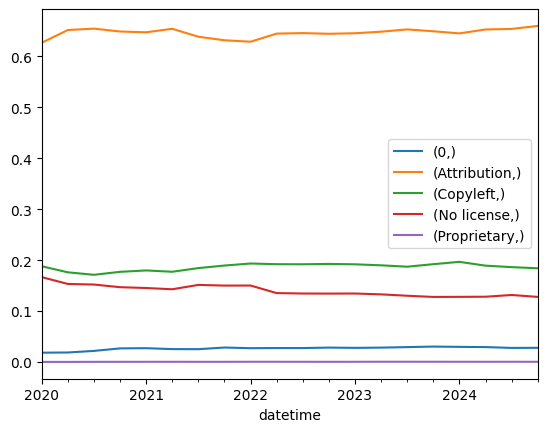

In [10]:
by_yq_pushers = df.groupby('datetime')['num_pushers'].sum()
for label, rows in by_license:
    by_dt = rows.groupby('datetime')['num_pushers'].sum() / by_yq_pushers
    by_dt.plot(label=label)
plt.legend()